<a href="https://colab.research.google.com/github/Yi-Wei-Lin/Tibame_AI_Project/blob/main/userdata/WilliamHuang/code/LSTM_Banana_Prediction_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 版本介紹

香蕉價格預測版本v1，
此版本目的是可以跑完模型並畫出圖，尚無判斷參數的選擇，以及預測結果是否合理
重要資訊簡介:
1. 氣候資料為1日 vs 1天價格
2. 尚未進行shift

In [ ]:
# 甘藍價格預測版本v1，此版本目的是可以跑完模型並畫出圖，尚無判斷參數的選擇，以及預測結果是否合理

# 原始氣候資料清洗

In [13]:
import os
import urllib.request

In [14]:
weather_data_url = 'https://github.com/Yi-Wei-Lin/Tibame_AI_Project/raw/main/userdata/amoswu/dataset/reportdaily_mean_fillna.csv'
typhoon_data_url = 'https://github.com/Yi-Wei-Lin/Tibame_AI_Project/raw/main/userdata/amoswu/dataset/TyphoonDatabase.csv'
price_data_url = 'https://github.com/Yi-Wei-Lin/Tibame_AI_Project/raw/main/userdata/lynnbai/dataset/Banana.csv'

In [15]:
if not os.path.exists('weather.csv'): urllib.request.urlretrieve(weather_data_url, 'weather.csv') 
if not os.path.exists('typhoon.csv'): urllib.request.urlretrieve(typhoon_data_url, 'typhoon.csv') 
if not os.path.exists('price.csv'): urllib.request.urlretrieve(price_data_url, 'price.csv')

In [16]:
import pandas as pd

In [17]:
city = {
    '基隆市':'KLU',
    '臺北市':'TPE',
    '新北市':'TPH',
    '桃園市':'TYC',
    '新竹市':'HSC',
    '新竹縣':'HSH',
    '苗栗縣':'MAL',
    '臺中市':'TXG',
    '彰化縣':'CWH',
    '南投縣':'NTO',
    '雲林縣':'YLH',
    '嘉義市':'CYI',
    '嘉義縣':'CHY',
    '臺南市':'TNN',
    '高雄市':'KHH',
    '屏東縣':'IUH',
    '宜蘭縣':'ILN',
    '花蓮縣':'HWA',
    '臺東縣':'TTT'
}

In [18]:
df = pd.read_csv('weather.csv', encoding='utf-8')
print(df)

              date city  StnPres  ...  UVIMax           UVIMaxTime CloudAmount
0       2000-01-01  南投縣    773.0  ...     0.0  2000-01-01 10:00:00         1.4
1       2000-01-01  嘉義市   1013.0  ...     4.0  2000-01-01 13:00:00         1.8
2       2000-01-01  嘉義縣    874.2  ...     4.0  2000-01-01 13:00:00         0.5
3       2000-01-01  基隆市   1009.2  ...     3.0  2000-01-01 13:00:00         6.0
4       2000-01-01  宜蘭縣    935.4  ...     4.0  2000-01-01 12:00:00         6.6
...            ...  ...      ...  ...     ...                  ...         ...
148955  2021-06-18  臺東縣    965.6  ...    13.3  2021-06-18 12:20:00         2.4
148956  2021-06-18  花蓮縣    965.9  ...    13.0  2021-06-18 13:00:00         4.3
148957  2021-06-18  苗栗縣    985.5  ...    11.0  2021-06-18 13:30:00         4.5
148958  2021-06-18  雲林縣    998.2  ...     9.0  2021-06-18 11:00:00         2.5
148959  2021-06-18  高雄市    997.9  ...     9.0  2021-06-18 14:00:00         6.0

[148960 rows x 36 columns]


In [19]:
# 使用index做merge
df_date = df['date'].drop_duplicates().to_frame().set_index('date')

for cityname, citycode in city.items():
    df_city = df.loc[df['city'] == cityname].add_suffix('_' + citycode).set_index('date' + '_' + citycode)
    df_date = pd.merge(df_date, df_city, how='left', left_index = True, right_index = True)

df_date.to_csv('all.csv', encoding='utf-8')
print(pd.read_csv('all.csv'))

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (130,132,305,307) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


            date city_KLU  ...       UVIMaxTime_TTT  CloudAmount_TTT
0     2000-01-01      基隆市  ...  2000-01-01 12:00:00              7.1
1     2000-01-02      基隆市  ...  2000-01-02 11:00:00              6.9
2     2000-01-03      基隆市  ...  2000-01-03 12:00:00              6.5
3     2000-01-04      基隆市  ...  2000-01-04 14:00:00              7.0
4     2000-01-05      基隆市  ...  2000-01-05 13:00:00              3.3
...          ...      ...  ...                  ...              ...
7835  2021-06-14      基隆市  ...  2021-06-14 12:40:00              4.5
7836  2021-06-15      基隆市  ...  2021-06-15 12:00:00              5.2
7837  2021-06-16      基隆市  ...  2021-06-16 12:20:00              4.4
7838  2021-06-17      基隆市  ...  2021-06-17 12:00:00              2.5
7839  2021-06-18      基隆市  ...  2021-06-18 12:20:00              2.4

[7840 rows x 666 columns]


In [20]:
typhoon_df = pd.read_csv('typhoon.csv', encoding='utf-8')
weather_df = pd.read_csv('all.csv', encoding='utf-8')
weather_df['WarnMark'] = 0
print(weather_df)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (130,132,305,307) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


            date city_KLU  ...  CloudAmount_TTT  WarnMark
0     2000-01-01      基隆市  ...              7.1         0
1     2000-01-02      基隆市  ...              6.9         0
2     2000-01-03      基隆市  ...              6.5         0
3     2000-01-04      基隆市  ...              7.0         0
4     2000-01-05      基隆市  ...              3.3         0
...          ...      ...  ...              ...       ...
7835  2021-06-14      基隆市  ...              4.5         0
7836  2021-06-15      基隆市  ...              5.2         0
7837  2021-06-16      基隆市  ...              4.4         0
7838  2021-06-17      基隆市  ...              2.5         0
7839  2021-06-18      基隆市  ...              2.4         0

[7840 rows x 667 columns]


颱風警報期間控制：period_ctrl 可調整 weather_df 資料表 WarnMark 欄位值為 1 之天數，如下範例：
* period_ctrl = 0, 2020-06-03 ... 1, 2020-06-04 ... 1
* period_ctrl = 2, 2020-06-01 ... 1, 2020-06-02 ... 1, 2020-06-03 ... 1, 2020-06-04 ... 1




In [21]:
# 警報日期處理
import datetime

period_ctrl = 0 # 颱風警報期間控制
warn_mark = list()
warn_start = list()
warn_end = list()

for wd in typhoon_df['Warning']:
  start = datetime.datetime.strptime(wd[0:10], '%Y-%m-%d')
  end = datetime.datetime.strptime(wd[17:27], '%Y-%m-%d')
  period = end - start # 每次颱風之期間時間資訊 (若為一天內的暫寫入0，表示僅有當天)
  # print(period.days)
  
  ctrl_start = start
  i = 0
  
  warn_mark.append(wd[0:10])
  while i < period.days: # 利用颱風天數期間append期間日期進warn_mark列表
    start = start + datetime.timedelta(days=1)
    warn_mark.append(datetime.datetime.strftime(start, '%Y-%m-%d'))
    i = i + 1
  warn_mark.append(wd[17:27])

  if period_ctrl != 0:
    j = 0
    while j < period_ctrl:
      ctrl_start = ctrl_start - datetime.timedelta(days=1)
      warn_mark.append(datetime.datetime.strftime(ctrl_start, '%Y-%m-%d'))
      j = j + 1

unique_set = set(warn_mark) # 打散日期排序
unique_list = list(unique_set)
warn_mark = list()
warn_mark = unique_list

In [22]:
# 欄位List
dataset_column_lists = ['date','city_KLU','StnPres_KLU','SeaPres_KLU','StnPresMax_KLU','StnPresMaxTime_KLU','StnPresMin_KLU','StnPresMinTime_KLU','Temperature_KLU','TMax_KLU','TMaxTime_KLU','TMin_KLU','TMinTime_KLU','TdDewPoint_KLU','RH_KLU','RHMin_KLU','RHMinTime_KLU','WS_KLU','WD_KLU','WSGust_KLU','WDGust_KLU','WGustTime_KLU','Precp_KLU','PrecpHour_KLU','PrecpMax10_KLU','PrecpMax10Time_KLU','PrecpMax60_KLU','PrecpMax60Time_KLU','SunShine_KLU','SunShineRate_KLU','GloblRad_KLU','VisbMean_KLU','EvapA_KLU','UVIMax_KLU','UVIMaxTime_KLU','CloudAmount_KLU','city_TPE','StnPres_TPE','SeaPres_TPE','StnPresMax_TPE','StnPresMaxTime_TPE','StnPresMin_TPE','StnPresMinTime_TPE','Temperature_TPE','TMax_TPE','TMaxTime_TPE','TMin_TPE','TMinTime_TPE','TdDewPoint_TPE','RH_TPE','RHMin_TPE','RHMinTime_TPE','WS_TPE','WD_TPE','WSGust_TPE','WDGust_TPE','WGustTime_TPE','Precp_TPE','PrecpHour_TPE','PrecpMax10_TPE','PrecpMax10Time_TPE','PrecpMax60_TPE','PrecpMax60Time_TPE','SunShine_TPE','SunShineRate_TPE','GloblRad_TPE','VisbMean_TPE','EvapA_TPE','UVIMax_TPE','UVIMaxTime_TPE','CloudAmount_TPE','city_TPH','StnPres_TPH','SeaPres_TPH','StnPresMax_TPH','StnPresMaxTime_TPH','StnPresMin_TPH','StnPresMinTime_TPH','Temperature_TPH','TMax_TPH','TMaxTime_TPH','TMin_TPH','TMinTime_TPH','TdDewPoint_TPH','RH_TPH','RHMin_TPH','RHMinTime_TPH','WS_TPH','WD_TPH','WSGust_TPH','WDGust_TPH','WGustTime_TPH','Precp_TPH','PrecpHour_TPH','PrecpMax10_TPH','PrecpMax10Time_TPH','PrecpMax60_TPH','PrecpMax60Time_TPH','SunShine_TPH','SunShineRate_TPH','GloblRad_TPH','VisbMean_TPH','EvapA_TPH','UVIMax_TPH','UVIMaxTime_TPH','CloudAmount_TPH','city_TYC','StnPres_TYC','SeaPres_TYC','StnPresMax_TYC','StnPresMaxTime_TYC','StnPresMin_TYC','StnPresMinTime_TYC','Temperature_TYC','TMax_TYC','TMaxTime_TYC','TMin_TYC','TMinTime_TYC','TdDewPoint_TYC','RH_TYC','RHMin_TYC','RHMinTime_TYC','WS_TYC','WD_TYC','WSGust_TYC','WDGust_TYC','WGustTime_TYC','Precp_TYC','PrecpHour_TYC','PrecpMax10_TYC','PrecpMax10Time_TYC','PrecpMax60_TYC','PrecpMax60Time_TYC','SunShine_TYC','SunShineRate_TYC','GloblRad_TYC','VisbMean_TYC','EvapA_TYC','UVIMax_TYC','UVIMaxTime_TYC','CloudAmount_TYC','city_HSC','StnPres_HSC','SeaPres_HSC','StnPresMax_HSC','StnPresMaxTime_HSC','StnPresMin_HSC','StnPresMinTime_HSC','Temperature_HSC','TMax_HSC','TMaxTime_HSC','TMin_HSC','TMinTime_HSC','TdDewPoint_HSC','RH_HSC','RHMin_HSC','RHMinTime_HSC','WS_HSC','WD_HSC','WSGust_HSC','WDGust_HSC','WGustTime_HSC','Precp_HSC','PrecpHour_HSC','PrecpMax10_HSC','PrecpMax10Time_HSC','PrecpMax60_HSC','PrecpMax60Time_HSC','SunShine_HSC','SunShineRate_HSC','GloblRad_HSC','VisbMean_HSC','EvapA_HSC','UVIMax_HSC','UVIMaxTime_HSC','CloudAmount_HSC','city_HSH','StnPres_HSH','SeaPres_HSH','StnPresMax_HSH','StnPresMaxTime_HSH','StnPresMin_HSH','StnPresMinTime_HSH','Temperature_HSH','TMax_HSH','TMaxTime_HSH','TMin_HSH','TMinTime_HSH','TdDewPoint_HSH','RH_HSH','RHMin_HSH','RHMinTime_HSH','WS_HSH','WD_HSH','WSGust_HSH','WDGust_HSH','WGustTime_HSH','Precp_HSH','PrecpHour_HSH','PrecpMax10_HSH','PrecpMax10Time_HSH','PrecpMax60_HSH','PrecpMax60Time_HSH','SunShine_HSH','SunShineRate_HSH','GloblRad_HSH','VisbMean_HSH','EvapA_HSH','UVIMax_HSH','UVIMaxTime_HSH','CloudAmount_HSH','city_MAL','StnPres_MAL','SeaPres_MAL','StnPresMax_MAL','StnPresMaxTime_MAL','StnPresMin_MAL','StnPresMinTime_MAL','Temperature_MAL','TMax_MAL','TMaxTime_MAL','TMin_MAL','TMinTime_MAL','TdDewPoint_MAL','RH_MAL','RHMin_MAL','RHMinTime_MAL','WS_MAL','WD_MAL','WSGust_MAL','WDGust_MAL','WGustTime_MAL','Precp_MAL','PrecpHour_MAL','PrecpMax10_MAL','PrecpMax10Time_MAL','PrecpMax60_MAL','PrecpMax60Time_MAL','SunShine_MAL','SunShineRate_MAL','GloblRad_MAL','VisbMean_MAL','EvapA_MAL','UVIMax_MAL','UVIMaxTime_MAL','CloudAmount_MAL','city_TXG','StnPres_TXG','SeaPres_TXG','StnPresMax_TXG','StnPresMaxTime_TXG','StnPresMin_TXG','StnPresMinTime_TXG','Temperature_TXG','TMax_TXG','TMaxTime_TXG','TMin_TXG','TMinTime_TXG','TdDewPoint_TXG','RH_TXG','RHMin_TXG','RHMinTime_TXG','WS_TXG','WD_TXG','WSGust_TXG','WDGust_TXG','WGustTime_TXG','Precp_TXG','PrecpHour_TXG','PrecpMax10_TXG','PrecpMax10Time_TXG','PrecpMax60_TXG','PrecpMax60Time_TXG','SunShine_TXG','SunShineRate_TXG','GloblRad_TXG','VisbMean_TXG','EvapA_TXG','UVIMax_TXG','UVIMaxTime_TXG','CloudAmount_TXG','city_CWH','StnPres_CWH','SeaPres_CWH','StnPresMax_CWH','StnPresMaxTime_CWH','StnPresMin_CWH','StnPresMinTime_CWH','Temperature_CWH','TMax_CWH','TMaxTime_CWH','TMin_CWH','TMinTime_CWH','TdDewPoint_CWH','RH_CWH','RHMin_CWH','RHMinTime_CWH','WS_CWH','WD_CWH','WSGust_CWH','WDGust_CWH','WGustTime_CWH','Precp_CWH','PrecpHour_CWH','PrecpMax10_CWH','PrecpMax10Time_CWH','PrecpMax60_CWH','PrecpMax60Time_CWH','SunShine_CWH','SunShineRate_CWH','GloblRad_CWH','VisbMean_CWH','EvapA_CWH','UVIMax_CWH','UVIMaxTime_CWH','CloudAmount_CWH','city_NTO','StnPres_NTO','SeaPres_NTO','StnPresMax_NTO','StnPresMaxTime_NTO','StnPresMin_NTO','StnPresMinTime_NTO','Temperature_NTO','TMax_NTO','TMaxTime_NTO','TMin_NTO','TMinTime_NTO','TdDewPoint_NTO','RH_NTO','RHMin_NTO','RHMinTime_NTO','WS_NTO','WD_NTO','WSGust_NTO','WDGust_NTO','WGustTime_NTO','Precp_NTO','PrecpHour_NTO','PrecpMax10_NTO','PrecpMax10Time_NTO','PrecpMax60_NTO','PrecpMax60Time_NTO','SunShine_NTO','SunShineRate_NTO','GloblRad_NTO','VisbMean_NTO','EvapA_NTO','UVIMax_NTO','UVIMaxTime_NTO','CloudAmount_NTO','city_YLH','StnPres_YLH','SeaPres_YLH','StnPresMax_YLH','StnPresMaxTime_YLH','StnPresMin_YLH','StnPresMinTime_YLH','Temperature_YLH','TMax_YLH','TMaxTime_YLH','TMin_YLH','TMinTime_YLH','TdDewPoint_YLH','RH_YLH','RHMin_YLH','RHMinTime_YLH','WS_YLH','WD_YLH','WSGust_YLH','WDGust_YLH','WGustTime_YLH','Precp_YLH','PrecpHour_YLH','PrecpMax10_YLH','PrecpMax10Time_YLH','PrecpMax60_YLH','PrecpMax60Time_YLH','SunShine_YLH','SunShineRate_YLH','GloblRad_YLH','VisbMean_YLH','EvapA_YLH','UVIMax_YLH','UVIMaxTime_YLH','CloudAmount_YLH','city_CYI','StnPres_CYI','SeaPres_CYI','StnPresMax_CYI','StnPresMaxTime_CYI','StnPresMin_CYI','StnPresMinTime_CYI','Temperature_CYI','TMax_CYI','TMaxTime_CYI','TMin_CYI','TMinTime_CYI','TdDewPoint_CYI','RH_CYI','RHMin_CYI','RHMinTime_CYI','WS_CYI','WD_CYI','WSGust_CYI','WDGust_CYI','WGustTime_CYI','Precp_CYI','PrecpHour_CYI','PrecpMax10_CYI','PrecpMax10Time_CYI','PrecpMax60_CYI','PrecpMax60Time_CYI','SunShine_CYI','SunShineRate_CYI','GloblRad_CYI','VisbMean_CYI','EvapA_CYI','UVIMax_CYI','UVIMaxTime_CYI','CloudAmount_CYI','city_CHY','StnPres_CHY','SeaPres_CHY','StnPresMax_CHY','StnPresMaxTime_CHY','StnPresMin_CHY','StnPresMinTime_CHY','Temperature_CHY','TMax_CHY','TMaxTime_CHY','TMin_CHY','TMinTime_CHY','TdDewPoint_CHY','RH_CHY','RHMin_CHY','RHMinTime_CHY','WS_CHY','WD_CHY','WSGust_CHY','WDGust_CHY','WGustTime_CHY','Precp_CHY','PrecpHour_CHY','PrecpMax10_CHY','PrecpMax10Time_CHY','PrecpMax60_CHY','PrecpMax60Time_CHY','SunShine_CHY','SunShineRate_CHY','GloblRad_CHY','VisbMean_CHY','EvapA_CHY','UVIMax_CHY','UVIMaxTime_CHY','CloudAmount_CHY','city_TNN','StnPres_TNN','SeaPres_TNN','StnPresMax_TNN','StnPresMaxTime_TNN','StnPresMin_TNN','StnPresMinTime_TNN','Temperature_TNN','TMax_TNN','TMaxTime_TNN','TMin_TNN','TMinTime_TNN','TdDewPoint_TNN','RH_TNN','RHMin_TNN','RHMinTime_TNN','WS_TNN','WD_TNN','WSGust_TNN','WDGust_TNN','WGustTime_TNN','Precp_TNN','PrecpHour_TNN','PrecpMax10_TNN','PrecpMax10Time_TNN','PrecpMax60_TNN','PrecpMax60Time_TNN','SunShine_TNN','SunShineRate_TNN','GloblRad_TNN','VisbMean_TNN','EvapA_TNN','UVIMax_TNN','UVIMaxTime_TNN','CloudAmount_TNN','city_KHH','StnPres_KHH','SeaPres_KHH','StnPresMax_KHH','StnPresMaxTime_KHH','StnPresMin_KHH','StnPresMinTime_KHH','Temperature_KHH','TMax_KHH','TMaxTime_KHH','TMin_KHH','TMinTime_KHH','TdDewPoint_KHH','RH_KHH','RHMin_KHH','RHMinTime_KHH','WS_KHH','WD_KHH','WSGust_KHH','WDGust_KHH','WGustTime_KHH','Precp_KHH','PrecpHour_KHH','PrecpMax10_KHH','PrecpMax10Time_KHH','PrecpMax60_KHH','PrecpMax60Time_KHH','SunShine_KHH','SunShineRate_KHH','GloblRad_KHH','VisbMean_KHH','EvapA_KHH','UVIMax_KHH','UVIMaxTime_KHH','CloudAmount_KHH','city_IUH','StnPres_IUH','SeaPres_IUH','StnPresMax_IUH','StnPresMaxTime_IUH','StnPresMin_IUH','StnPresMinTime_IUH','Temperature_IUH','TMax_IUH','TMaxTime_IUH','TMin_IUH','TMinTime_IUH','TdDewPoint_IUH','RH_IUH','RHMin_IUH','RHMinTime_IUH','WS_IUH','WD_IUH','WSGust_IUH','WDGust_IUH','WGustTime_IUH','Precp_IUH','PrecpHour_IUH','PrecpMax10_IUH','PrecpMax10Time_IUH','PrecpMax60_IUH','PrecpMax60Time_IUH','SunShine_IUH','SunShineRate_IUH','GloblRad_IUH','VisbMean_IUH','EvapA_IUH','UVIMax_IUH','UVIMaxTime_IUH','CloudAmount_IUH','city_ILN','StnPres_ILN','SeaPres_ILN','StnPresMax_ILN','StnPresMaxTime_ILN','StnPresMin_ILN','StnPresMinTime_ILN','Temperature_ILN','TMax_ILN','TMaxTime_ILN','TMin_ILN','TMinTime_ILN','TdDewPoint_ILN','RH_ILN','RHMin_ILN','RHMinTime_ILN','WS_ILN','WD_ILN','WSGust_ILN','WDGust_ILN','WGustTime_ILN','Precp_ILN','PrecpHour_ILN','PrecpMax10_ILN','PrecpMax10Time_ILN','PrecpMax60_ILN','PrecpMax60Time_ILN','SunShine_ILN','SunShineRate_ILN','GloblRad_ILN','VisbMean_ILN','EvapA_ILN','UVIMax_ILN','UVIMaxTime_ILN','CloudAmount_ILN','city_HWA','StnPres_HWA','SeaPres_HWA','StnPresMax_HWA','StnPresMaxTime_HWA','StnPresMin_HWA','StnPresMinTime_HWA','Temperature_HWA','TMax_HWA','TMaxTime_HWA','TMin_HWA','TMinTime_HWA','TdDewPoint_HWA','RH_HWA','RHMin_HWA','RHMinTime_HWA','WS_HWA','WD_HWA','WSGust_HWA','WDGust_HWA','WGustTime_HWA','Precp_HWA','PrecpHour_HWA','PrecpMax10_HWA','PrecpMax10Time_HWA','PrecpMax60_HWA','PrecpMax60Time_HWA','SunShine_HWA','SunShineRate_HWA','GloblRad_HWA','VisbMean_HWA','EvapA_HWA','UVIMax_HWA','UVIMaxTime_HWA','CloudAmount_HWA','city_TTT','StnPres_TTT','SeaPres_TTT','StnPresMax_TTT','StnPresMaxTime_TTT','StnPresMin_TTT','StnPresMinTime_TTT','Temperature_TTT','TMax_TTT','TMaxTime_TTT','TMin_TTT','TMinTime_TTT','TdDewPoint_TTT','RH_TTT','RHMin_TTT','RHMinTime_TTT','WS_TTT','WD_TTT','WSGust_TTT','WDGust_TTT','WGustTime_TTT','Precp_TTT','PrecpHour_TTT','PrecpMax10_TTT','PrecpMax10Time_TTT','PrecpMax60_TTT','PrecpMax60Time_TTT','SunShine_TTT','SunShineRate_TTT','GloblRad_TTT','VisbMean_TTT','EvapA_TTT','UVIMax_TTT','UVIMaxTime_TTT','CloudAmount_TTT','WarnMark']

清洗後之氣候資料輸出

In [23]:
import csv

weather_list = weather_df.values.tolist()

with open('weather_dataset.csv', 'w', newline='') as csvfile:
  writer = csv.writer(csvfile)
  
  writer.writerow(dataset_column_lists)

  for wl in weather_list:
    f = 0
    for wm in warn_mark:
      if wl[0] == wm:
        wl[666] = 1 # w1[666]即為 warn_mark值之所在
        writer.writerow(wl)
        f = 1
    if f == 0:
      writer.writerow(wl)

# 環境與資料匯入

In [24]:
from keras.layers.core import Dense, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential, load_model
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

weather = pd.read_csv('weather_dataset.csv', encoding='utf-8')
price = pd.read_csv('price.csv', encoding='utf-8')


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (130,132,305,307) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# 資料預處理

# 市場
1. 選定 台北一 市場
2. 以中位數 補其 空值

market_tp1_df 為整理後之台北一市場 -- DataFrame

In [25]:
price_tp1_df = price.loc[price['Market'] == '台北一']

columns = ['Up_price', 'Mid_price', 'Low_price', 'Avg_price', 'Volume']
med = price_tp1_df.loc[:,columns].median()
values = {'Up_price':med['Up_price'], 'Mid_price':med['Mid_price'], 'Low_price':med['Low_price'], 'Avg_price':med['Avg_price'], 'Volume':med['Volume']}
new_price_tp1_df = price_tp1_df.fillna(value=values)

market_tp1_df = new_price_tp1_df['Avg_price']
market_tp1_df = market_tp1_df.reset_index().drop(['index'], axis=1)
market_tp1_df

,Avg_price
0,20.2
1,19.5
2,20.3
3,20.0
4,20.3
...,...
7835,22.5
7836,22.5
7837,23.2
7838,20.9


# 氣象
1. 選出 與模型無關者排除
2. 其餘暫無空值

weather_df 為整理後之氣象資料 -- DataFrame

In [26]:
# drop the useless 
drop_list = ['date','city_KLU','city_TPE','city_TPH','city_TYC','city_HSC','city_HSH','city_MAL','city_TXG','city_CWH','city_NTO','city_YLH','city_CYI','city_CHY','city_TNN','city_KHH','city_IUH','city_ILN','city_HWA','city_TTT','StnPresMaxTime_KLU','StnPresMinTime_KLU','TMaxTime_KLU','TMinTime_KLU','RHMinTime_KLU','WGustTime_KLU','PrecpMax10Time_KLU','PrecpMax60Time_KLU','UVIMaxTime_KLU','UVIMaxTime_KLU','StnPresMaxTime_TPE','StnPresMinTime_TPE','TMaxTime_TPE','TMinTime_TPE','RHMinTime_TPE','WGustTime_TPE','PrecpMax10Time_TPE','PrecpMax60_TPE','PrecpMax60Time_TPE','UVIMaxTime_TPE','StnPresMaxTime_TPH','StnPresMinTime_TPH','TMaxTime_TPH','TMinTime_TPH','RHMinTime_TPH','WGustTime_TPH','PrecpMax10Time_TPH','PrecpMax60_TPH','PrecpMax60Time_TPH','UVIMaxTime_TPH','StnPresMaxTime_TYC','StnPresMinTime_TYC','TMaxTime_TYC','TMinTime_TYC','RHMinTime_TYC','WGustTime_TYC','PrecpMax10Time_TYC','PrecpMax60_TYC','PrecpMax60Time_TYC','UVIMaxTime_TYC','StnPresMaxTime_HSC','StnPresMinTime_HSC','TMaxTime_HSC','TMinTime_HSC','RHMinTime_HSC','WGustTime_HSC','PrecpMax10Time_HSC','PrecpMax60_HSC','PrecpMax60Time_HSC','UVIMaxTime_HSC','StnPresMaxTime_HSH','StnPresMinTime_HSH','TMaxTime_HSH','TMinTime_HSH','RHMinTime_HSH','WGustTime_HSH','PrecpMax10Time_HSH','PrecpMax60_HSH','PrecpMax60Time_HSH','UVIMaxTime_HSH','StnPresMaxTime_MAL','StnPresMinTime_MAL','TMaxTime_MAL','TMinTime_MAL','RHMinTime_MAL','WGustTime_MAL','PrecpMax10Time_MAL','PrecpMax60_MAL','PrecpMax60Time_MAL','UVIMaxTime_MAL','StnPresMaxTime_TXG','StnPresMinTime_TXG','TMaxTime_TXG','TMinTime_TXG','RHMinTime_TXG','WGustTime_TXG','PrecpMax10Time_TXG','PrecpMax60_TXG','PrecpMax60Time_TXG','UVIMaxTime_TXG','StnPresMaxTime_CWH','StnPresMinTime_CWH','TMaxTime_CWH','TMinTime_CWH','RHMinTime_CWH','WGustTime_CWH','PrecpMax10Time_CWH','PrecpMax60_CWH','PrecpMax60Time_CWH','UVIMaxTime_CWH','StnPresMaxTime_NTO','StnPresMinTime_NTO','TMaxTime_NTO','TMinTime_NTO','RHMinTime_NTO','WGustTime_NTO','PrecpMax10Time_NTO','PrecpMax60_NTO','PrecpMax60Time_NTO','UVIMaxTime_NTO','StnPresMaxTime_YLH','StnPresMinTime_YLH','TMaxTime_YLH','TMinTime_YLH','RHMinTime_YLH','WGustTime_YLH','PrecpMax10Time_YLH','PrecpMax60_YLH','PrecpMax60Time_YLH','UVIMaxTime_YLH','StnPresMaxTime_CYI','StnPresMinTime_CYI','TMaxTime_CYI','TMinTime_CYI','RHMinTime_CYI','WGustTime_CYI','PrecpMax10Time_CYI','PrecpMax60_CYI','PrecpMax60Time_CYI','UVIMaxTime_CYI','StnPresMaxTime_CHY','StnPresMinTime_CHY','TMaxTime_CHY','TMinTime_CHY','RHMinTime_CHY','WGustTime_CHY','PrecpMax10Time_CHY','PrecpMax60_CHY','PrecpMax60Time_CHY','UVIMaxTime_CHY','StnPresMaxTime_TNN','StnPresMinTime_TNN','TMaxTime_TNN','TMinTime_TNN','RHMinTime_TNN','WGustTime_TNN','PrecpMax10Time_TNN','PrecpMax60_TNN','PrecpMax60Time_TNN','UVIMaxTime_TNN','StnPresMaxTime_KHH','StnPresMinTime_KHH','TMaxTime_KHH','TMinTime_KHH','RHMinTime_KHH','WGustTime_KHH','PrecpMax10Time_KHH','PrecpMax60_KHH','PrecpMax60Time_KHH','UVIMaxTime_KHH','StnPresMaxTime_IUH','StnPresMinTime_IUH','TMaxTime_IUH','TMinTime_IUH','RHMinTime_IUH','WGustTime_IUH','PrecpMax10Time_IUH','PrecpMax60_IUH','PrecpMax60Time_IUH','UVIMaxTime_IUH','StnPresMaxTime_ILN','StnPresMinTime_ILN','TMaxTime_ILN','TMinTime_ILN','RHMinTime_ILN','WGustTime_ILN','PrecpMax10Time_ILN','PrecpMax60_ILN','PrecpMax60Time_ILN','UVIMaxTime_ILN','StnPresMaxTime_HWA','StnPresMinTime_HWA','TMaxTime_HWA','TMinTime_HWA','RHMinTime_HWA','WGustTime_HWA','PrecpMax10Time_HWA','PrecpMax60_HWA','PrecpMax60Time_HWA','UVIMaxTime_HWA','StnPresMaxTime_TTT','StnPresMinTime_TTT','TMaxTime_TTT','TMinTime_TTT','RHMinTime_TTT','WGustTime_TTT','PrecpMax10Time_TTT','PrecpMax60_TTT','PrecpMax60Time_TTT','UVIMaxTime_TTT']
print(len(drop_list))
weather_df = weather.drop(drop_list, axis=1)
weather_df

210


,StnPres_KLU,SeaPres_KLU,StnPresMax_KLU,StnPresMin_KLU,Temperature_KLU,TMax_KLU,TMin_KLU,TdDewPoint_KLU,RH_KLU,RHMin_KLU,WS_KLU,WD_KLU,WSGust_KLU,WDGust_KLU,Precp_KLU,PrecpHour_KLU,PrecpMax10_KLU,PrecpMax60_KLU,SunShine_KLU,SunShineRate_KLU,GloblRad_KLU,VisbMean_KLU,EvapA_KLU,UVIMax_KLU,CloudAmount_KLU,StnPres_TPE,SeaPres_TPE,StnPresMax_TPE,StnPresMin_TPE,Temperature_TPE,TMax_TPE,TMin_TPE,TdDewPoint_TPE,RH_TPE,RHMin_TPE,WS_TPE,WD_TPE,WSGust_TPE,WDGust_TPE,Precp_TPE,...,RHMin_HWA,WS_HWA,WD_HWA,WSGust_HWA,WDGust_HWA,Precp_HWA,PrecpHour_HWA,PrecpMax10_HWA,SunShine_HWA,SunShineRate_HWA,GloblRad_HWA,VisbMean_HWA,EvapA_HWA,UVIMax_HWA,CloudAmount_HWA,StnPres_TTT,SeaPres_TTT,StnPresMax_TTT,StnPresMin_TTT,Temperature_TTT,TMax_TTT,TMin_TTT,TdDewPoint_TTT,RH_TTT,RHMin_TTT,WS_TTT,WD_TTT,WSGust_TTT,WDGust_TTT,Precp_TTT,PrecpHour_TTT,PrecpMax10_TTT,SunShine_TTT,SunShineRate_TTT,GloblRad_TTT,VisbMean_TTT,EvapA_TTT,UVIMax_TTT,CloudAmount_TTT,WarnMark
0,1009.2,1016.9,1011.0,1007.2,19.3,22.6,16.9,14.3,73.5,63.0,3.8,280.0,10.6,180.0,2.2,0.4,1.9,2.2,3.8,36.6,5.6,13.9,2.0,3.0,6.0,996.4,1184.6,998.6,994.4,17.5,21.1,14.3,11.9,78.7,51.0,1.2,230.9,7.2,197.3,0.0,...,58.0,0.8,221.7,4.5,162.7,0.5,0.0,0.0,4.1,37.0,7.9,12.8,1.2,6.0,7.4,956.6,1015.0,989.5,982.9,19.2,25.0,17.7,16.9,74.8,61.8,1.8,119.2,7.2,75.2,0.0,0.0,0.1,3.1,28.9,7.6,15.5,2.9,6.0,7.1,0
1,1010.9,1018.6,1012.6,1008.8,18.6,21.7,15.2,11.4,64.5,54.5,4.7,130.0,11.7,85.0,0.0,0.0,0.0,0.0,8.5,79.8,8.0,9.3,2.6,3.0,3.8,997.6,1187.6,999.4,995.2,16.8,22.6,12.1,9.0,68.7,43.3,1.9,98.3,10.0,93.7,0.0,...,42.0,1.1,215.7,6.7,139.9,0.3,0.0,0.0,2.6,23.0,7.2,13.0,1.5,5.0,9.0,957.0,1015.9,976.0,971.3,17.9,22.1,16.5,14.1,64.0,50.2,2.8,119.8,11.4,89.7,0.0,0.0,0.0,4.2,38.9,8.5,14.6,3.6,2.0,6.9,0
2,1011.0,1018.6,1012.9,1009.2,18.7,20.8,16.3,10.0,58.0,48.0,3.9,60.0,10.3,85.0,0.0,0.0,0.0,0.0,5.0,47.4,7.0,8.8,3.0,3.0,5.1,997.1,1185.5,999.0,995.4,17.6,20.8,15.3,10.7,76.7,62.3,2.3,79.2,10.3,89.0,0.0,...,56.0,0.8,210.9,4.8,172.4,0.1,0.0,0.0,1.8,16.7,5.0,10.3,2.5,3.0,8.5,958.2,1016.9,989.8,986.6,16.9,22.2,16.2,13.5,64.2,56.5,2.2,101.1,9.8,66.7,0.0,0.0,0.0,5.2,47.8,8.0,13.1,3.2,4.0,6.5,0
3,1008.9,1016.5,1010.5,1006.8,20.5,24.2,17.4,13.7,66.0,51.0,3.6,165.0,11.3,165.0,0.0,0.0,0.0,0.0,6.7,62.8,7.4,10.7,2.1,4.0,4.4,995.6,1182.7,997.1,993.6,18.6,24.4,14.8,13.1,79.7,56.0,1.1,147.8,7.1,156.4,0.0,...,55.0,0.7,222.1,4.4,228.7,0.0,0.0,0.0,4.0,36.9,7.7,11.8,2.6,5.0,7.9,957.5,1016.1,988.8,985.7,17.2,23.1,16.5,14.6,67.5,58.0,1.5,136.2,5.9,204.2,0.0,0.0,0.0,3.1,28.5,7.0,12.3,2.6,4.0,7.0,0
4,1007.1,1014.8,1008.6,1005.6,18.6,21.2,16.6,14.3,77.0,65.5,3.4,245.0,9.6,265.0,0.0,0.0,0.0,0.0,7.3,69.0,8.2,8.2,2.6,4.0,3.6,994.3,1179.8,995.6,992.7,18.3,23.5,14.7,11.5,70.0,47.0,1.0,270.3,7.0,277.9,0.0,...,52.0,1.0,237.4,6.0,210.7,0.0,0.0,0.0,9.2,85.3,10.8,12.3,3.1,6.0,4.3,955.7,1013.8,987.5,982.6,19.5,26.6,16.8,17.2,72.5,61.0,1.4,191.3,7.3,225.0,0.2,0.2,0.6,8.9,82.9,12.1,16.4,2.5,6.0,3.3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7835,997.3,1005.4,999.9,995.3,29.6,34.1,27.3,26.1,79.8,58.8,4.7,173.2,13.6,253.0,0.0,0.0,0.0,0.0,8.7,63.7,24.9,31.0,7.4,13.0,7.5,978.9,1164.5,981.5,976.7,29.1,34.7,25.4,22.1,69.2,52.6,2.1,253.4,9.5,269.0,0.0,...,62.0,1.0,141.7,6.3,138.0,0.2,0.0,0.0,9.1,67.1,23.1,15.6,5.2,13.0,4.1,966.7,1005.6,969.3,964.9,27.2,31.5,23.8,25.7,83.9,62.6,1.6,139.8,7.4,172.0,0.0,0.0,0.0,10.3,75.8,26.8,23.5,5.8,13.3,4.5,0
7836,994.7,1002.9,995.9,993.5,30.2,33.5,27.6,26.0,76.2,62.8,6.1,231.2,16.5,253.0,0.0,0.0,0.0,0.0,10.9,79.5,27.3,30.6,7.9,13.0,7.2,976.6,1156.6,977.9,975.2,29.4,33.3,26.1,22.6,70.1,56.3,2.5,262.6,11.7,268.2,0.0,...,58.8,1.0,98.9,5.9,131.0,0.0,0.0,0.0,11.3,83.3,26.9,16.9,6.7,13.0,4.1,964.6,1003.2,966.3,963.3,27.5,32.1,24.2,25.4,79.9,59.2,2.0,148.6,9.

Dataset 空值數量確認

In [27]:
# na 數量計算
market_tp1_na_count = market_tp1_df.isna().sum()
weather_na_count = weather_df.isna().sum()

total_na_count = list() # 氣象空值查找
for i in range(len(weather_na_count.index)):
  if weather_na_count.values[i] != 0 :
    total_na_count.append([weather_na_count.index[i], weather_na_count.values[i]])

print(market_tp1_na_count)
print(len(total_na_count))
market_tp1_df.to_excel('market_tp1_df.xlsx', index=True)
weather_df.to_csv('weather_df.csv', index=True)

Avg_price    0
dtype: int64
0


# 模型參數調整

X 為 氣候 MinMaxScaler後之資料 \\
Y 為 市場 MinMaxScaler後之資料


In [51]:
# conversion to numpy array
x, y = weather_df.values, market_tp1_df.values

# scaling values for model
x_scale = MinMaxScaler()
y_scale = MinMaxScaler()

X = x_scale.fit_transform(x)
# Y = y_scale.fit_transform(y.reshape(-1,1))
Y = y_scale.fit_transform(y)

print(X.shape)
print(Y.shape)

(7840, 458)
(7840, 1)


In [52]:
# splitting train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1)
X_train = X_train.reshape((-1,1,458))
# y_train = y_train.reshape((-1,1,1))
X_test = X_test.reshape((-1,1,458))
# y_test = y_test.reshape((-1,1,1))

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

# pd.DataFrame(X_test)

X_train shape: (7056, 1, 458)
y_train shape: (7056, 1)
X_test shape: (784, 1, 458)
y_test shape: (784, 1)


In [53]:
# creating model using Keras
# tf.reset_default_graph()

model_name = 'banana_prediction_LSTM'

model = Sequential()
model.add(LSTM(units=256,
    return_sequences=True,
    input_shape=(X_train.shape[1], 458)))
model.add(Dropout(0.2))

model.add(LSTM(units=128,
    return_sequences=True,
))
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))
model.compile(loss='mse', optimizer='adam')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 1, 256)            732160    
_________________________________________________________________
dropout_2 (Dropout)          (None, 1, 256)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 1, 128)            197120    
_________________________________________________________________
dropout_3 (Dropout)          (None, 1, 128)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 1, 1)              129       
Total params: 929,409
Trainable params: 929,409
Non-trainable params: 0
_________________________________________________________________


In [54]:
# model = load_model("{}.h5".format(model_name))
# print("MODEL-LOADED")

model.fit(X_train, y_train, batch_size=500, epochs=100, validation_split=0.1, verbose=1)
model.save("{}.h5".format(model_name))
print('MODEL-SAVED')


Epoch 1/100
13/13 [==============================] - 10s 225ms/step - loss: 0.0414 - val_loss: 0.0164
Epoch 2/100
13/13 [==============================] - 1s 79ms/step - loss: 0.0169 - val_loss: 0.0161
Epoch 3/100
13/13 [==============================] - 1s 78ms/step - loss: 0.0153 - val_loss: 0.0152
Epoch 4/100
13/13 [==============================] - 1s 80ms/step - loss: 0.0151 - val_loss: 0.0140
Epoch 5/100
13/13 [==============================] - 1s 79ms/step - loss: 0.0134 - val_loss: 0.0122
Epoch 6/100
13/13 [==============================] - 1s 80ms/step - loss: 0.0125 - val_loss: 0.0117
Epoch 7/100
13/13 [==============================] - 1s 79ms/step - loss: 0.0121 - val_loss: 0.0111
Epoch 8/100
13/13 [==============================] - 1s 79ms/step - loss: 0.0116 - val_loss: 0.0110
Epoch 9/100
13/13 [==============================] - 1s 79ms/step - loss: 0.0113 - val_loss: 0.0106
Epoch 10/100
13/13 [==============================] - 1s 79ms/step - loss: 0.0107 - val_loss: 0.01

fit()用於訓練具有給定輸入的模型。

predict()用於實際預測。它爲輸入樣本生成輸出預測。

evaluate()用於評估已經過訓練的模型。返回模型的損失值&指標值。

In [55]:
score = model.evaluate(X_test, y_test)
print('Score: {}'.format(score))
yhat = model.predict(X_test)
# yhat.shape
yhat = y_scale.inverse_transform(yhat.reshape(-1, 1))
score

25/25 [==============================] - 0s 5ms/step - loss: 0.0060
Score: 0.005986239295452833


0.005986239295452833

In [56]:
# inverse_transform 要注意不要重複轉換，資料會重複通膨
y_test = y_scale.inverse_transform(y_test)

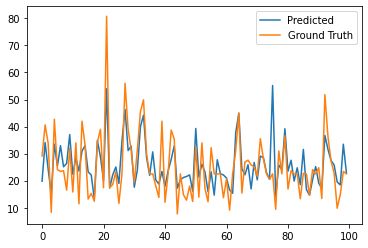

In [57]:

plt.plot(yhat[-100:], label='Predicted')
plt.plot(y_test[-100:], label='Ground Truth')
plt.legend()
plt.show()
# yhat

In [58]:
from sklearn.metrics import mean_squared_error, r2_score
MSE = mean_squared_error(y_test, yhat)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test, yhat)
print(f"MSE value : {MSE}", f"\nRMSE value : {RMSE}", f"\nR2 score value : {R2}")

MSE value : 55.745355211910635 
RMSE value : 7.466281217039085 
R2 score value : 0.6132722767015704


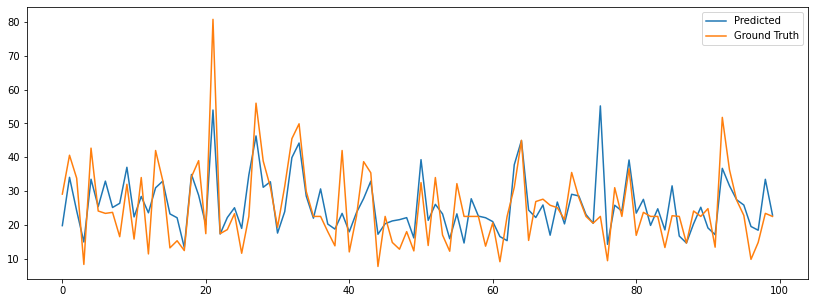

In [59]:
plt.figure(figsize=(14,5))
plt.plot(yhat[-100:], label='Predicted')
plt.plot(y_test[-100:], label='Ground Truth')
plt.legend()
plt.show()